## Linear Regression Example 1 : PyTorch



In [ ]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

### Step 1. Data

In [ ]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

In [ ]:
print(x_train)
print(x_train.dim(), x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
2 torch.Size([3, 1])


In [ ]:
print(y_train)
print(y_train.dim(), y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
2 torch.Size([3, 1])


Plot the data

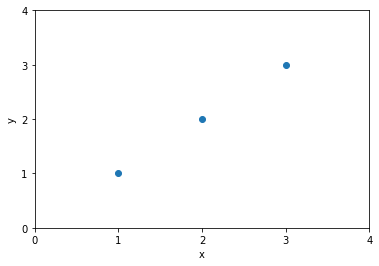

In [ ]:
plt.plot(x_train, y_train, 'o')
plt.xticks(np.arange(0, 4.1, step=1))
plt.yticks(np.arange(0, 4.1, step=1))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Step 2. Linear Regression Model

In [ ]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = LinearModel()

### Step 3. Loss and Optimizer

In [ ]:
criterion = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### Step 4. Train the model

In [ ]:
epochs = 1000
for epoch in range(epochs+1):
    y_pred = model(x_train) 
    loss = criterion(y_pred, y_train)
    
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step()

    params = list(model.parameters())
    W = params[0].item()
    b = params[1].item()
    if epoch % 100 == 0:
      print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, epochs, W, b, loss.item()))

Epoch    0/1000 W: 0.312, b: -0.234 Cost: 3.673282
Epoch  100/1000 W: 0.980, b: 0.045 Cost: 0.000297
Epoch  200/1000 W: 0.984, b: 0.036 Cost: 0.000184
Epoch  300/1000 W: 0.988, b: 0.028 Cost: 0.000114
Epoch  400/1000 W: 0.990, b: 0.022 Cost: 0.000070
Epoch  500/1000 W: 0.992, b: 0.017 Cost: 0.000043
Epoch  600/1000 W: 0.994, b: 0.014 Cost: 0.000027
Epoch  700/1000 W: 0.995, b: 0.011 Cost: 0.000017
Epoch  800/1000 W: 0.996, b: 0.008 Cost: 0.000010
Epoch  900/1000 W: 0.997, b: 0.007 Cost: 0.000006
Epoch 1000/1000 W: 0.998, b: 0.005 Cost: 0.000004


Print the predicted output

In [ ]:
y_arr = y_pred.data.numpy()
print(y_arr)

[[1.0029231]
 [2.0006273]
 [2.9983315]]


Print the updated weight W and bias b

In [ ]:
print('W = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())

W =  0.9977096915245056
b =  0.0052064587362110615


Step 5. Test

In [ ]:
x_test = torch.arange(-1, 4, 0.1) # test data
x_test = torch.unsqueeze(x_test, dim=1)
with torch.no_grad():
  y_test = model(x_test)  # predicted output

Plot the results

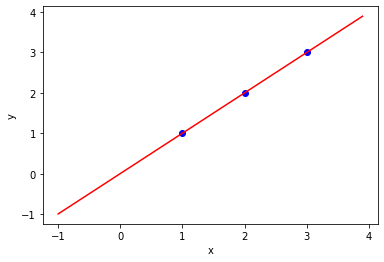

In [ ]:
y_test = y_test.numpy()

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()